<a href="https://colab.research.google.com/github/Nithesh-b/miniproject2/blob/master/Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Reading the dataset

In [2]:
data = pd.read_csv('/content/CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [0]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data [ x Marks] 

In [4]:
# scaling 
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


## 4. Finding groups

### Approach 1

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

In [0]:
# dendrograms 
Z = sch.linkage(data, 'ward')
Y = sch.linkage(data, 'complete')
X = sch.linkage(data, 'average')

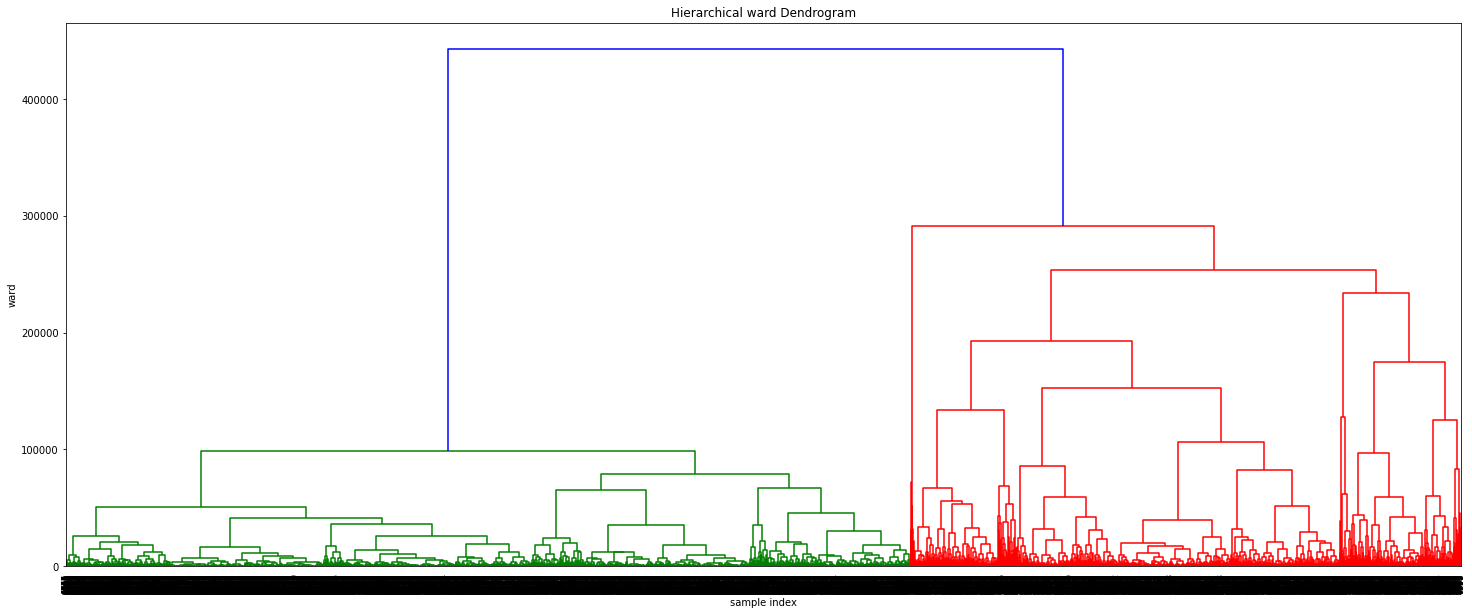

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical ward Dendrogram')
plt.xlabel('sample index')
plt.ylabel('ward')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

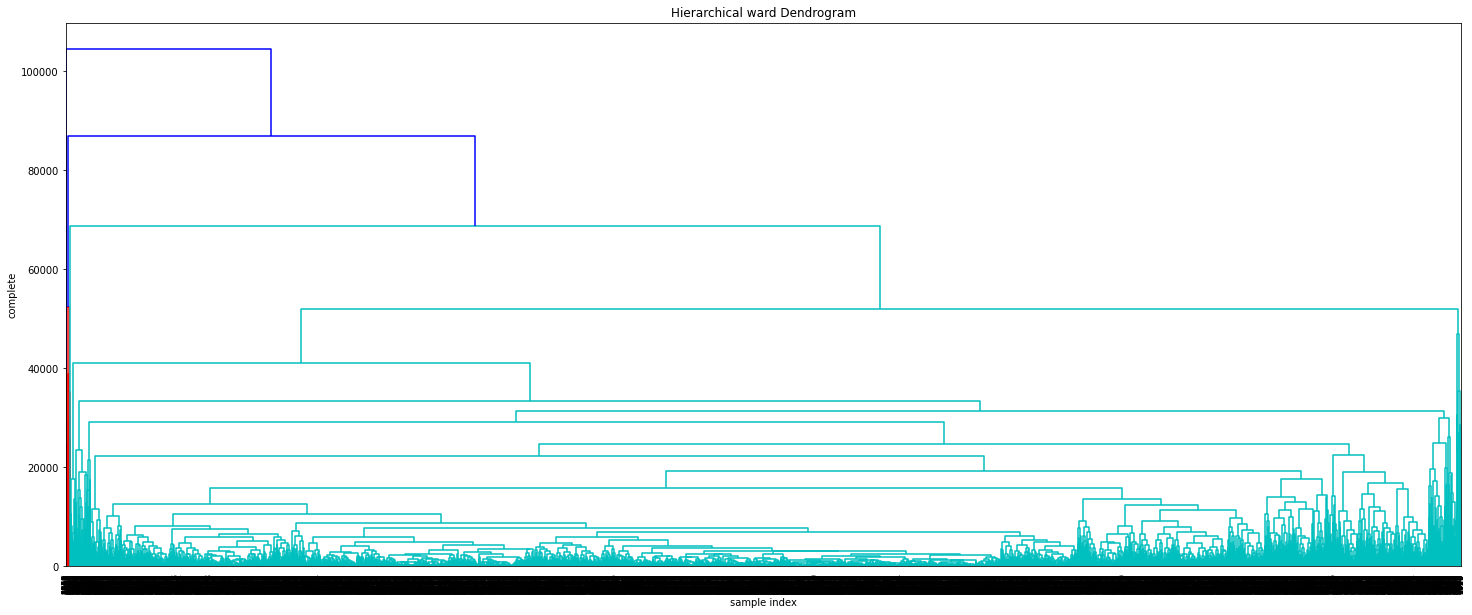

In [42]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical ward Dendrogram')
plt.xlabel('sample index')
plt.ylabel('complete')
sch.dendrogram(
    Y,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

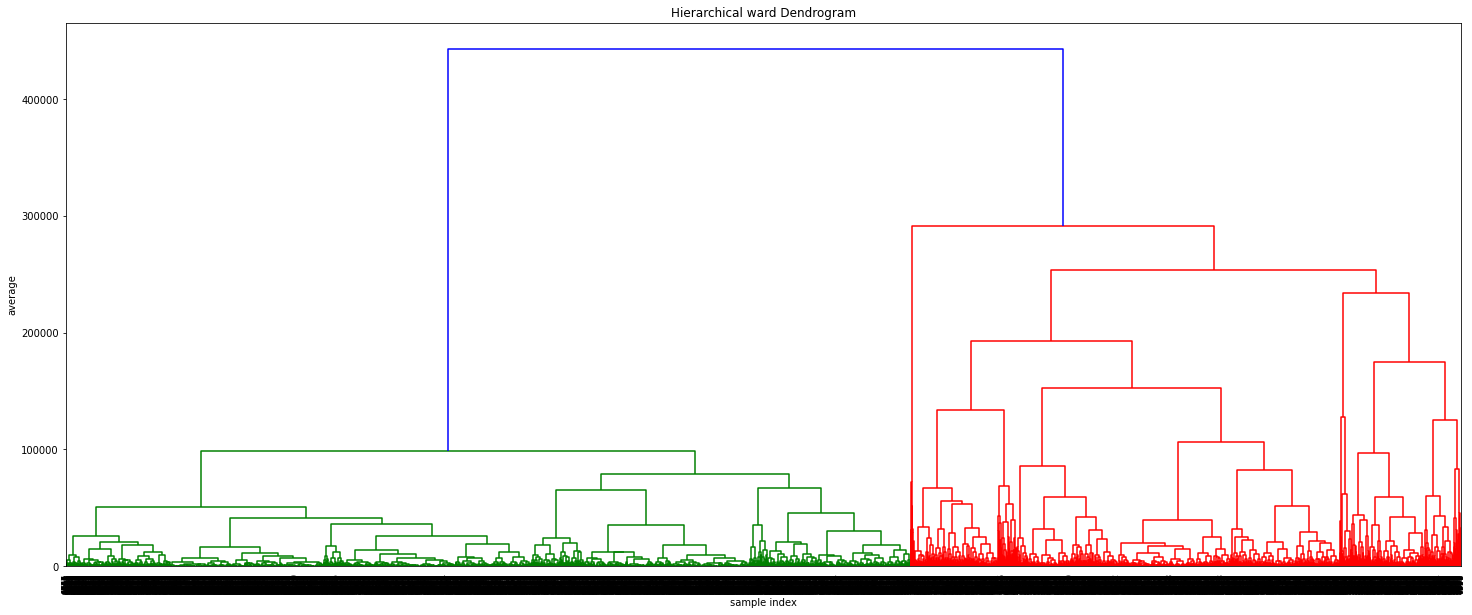

In [0]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical ward Dendrogram')
plt.xlabel('sample index')
plt.ylabel('average')
sch.dendrogram(
    X,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

In [0]:
# clustering (hint: Use AgglomerativeClustering imported above)
ag_cluster = AgglomerativeClustering(n_clusters=5)
ag_cluster1 = ag_cluster.fit(data)

In [0]:
ag_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage = 'complete')
ag_cluster2 = ag_cluster.fit(data)

In [0]:
ag_cluster = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage = 'average')
ag_cluster3 = ag_cluster.fit(data)

In [36]:
from sklearn.metrics import silhouette_score
silhouette_score(data, ag_cluster1.labels_)

0.38373589788779544

In [37]:
silhouette_score(data, ag_cluster2.labels_)

0.7615425264248007

In [38]:
silhouette_score(data, ag_cluster3.labels_)

0.05422684863653641

The silhoutte score shows that the euclidean score shows a better result.

### Approach 2
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [0]:
dbsc = DBSCAN(eps = .1, min_samples = 5).fit(data)
labels1 = dbsc.labels_
core_samples = np.zeros_like(labels1, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [0]:
dbsc = DBSCAN(eps = .5, min_samples = 3).fit(data)
labels2 = dbsc.labels_
core_samples = np.zeros_like(labels2, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [0]:
dbsc = DBSCAN(eps = .8, min_samples = 5).fit(data)
labels3 = dbsc.labels_
core_samples = np.zeros_like(labels3, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [0]:
# clustering 

## 5. Visualization 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

In [0]:
pca = PCA(n_components = 2) 
data_principal = pca.fit_transform(data)


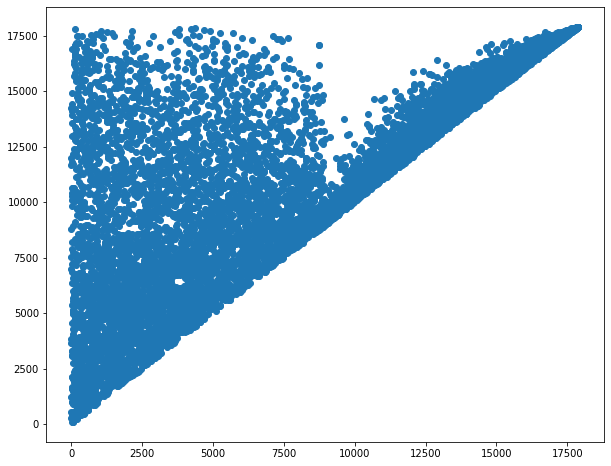

In [48]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 
plt.figure(figsize=(10, 8))
plt.scatter(Z[:,0], Z[:,1], cmap='prism')